In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import numpy as np
import random
from vae import VAE
from dataloader import UTKFaceDataset
import seaborn as sns
import pandas as pd
from ae import AutoEncoderNet

In [ ]:
device = "cuda"
#VAE 32 model_path = "/homes/hinge/projects/02582_Computational_Data_Analysis_Case2/autoencoder/models/1651056140.0680115.pt"
model_path = "/homes/hinge/projects/02582_Computational_Data_Analysis_Case2/autoencoder/models/1651088747.9110165.pt"
test_loader = torch.utils.data.DataLoader(UTKFaceDataset(data_type="test"), batch_size = 64, shuffle=False, num_workers=0, pin_memory=True)
#model = VAE(zDim=32)
model = AutoEncoderNet(n_channels=1, dim_last_layer=(64, 21, 21), latent_features=10)
model.load_state_dict(torch.load(model_path))
model.cuda()
model.eval()

AutoEncoderNet(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2))
    (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU()
    (5): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2))
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU()
    (8): Conv2d(64, 64, kernel_size=(5, 5), stride=(2, 2))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Flatten(start_dim=1, end_dim=-1)
    (12): Linear(in_features=28224, out_features=512, bias=True)
    (13): ReLU()
    (14): Linear(in_features=512, out_features=10, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=10, out_features=28224, bias=True)
    (1): ReLU()
    (2): Unflatten(dim=1, unflattened_size=(64, 21, 21))
    (3): ConvTranspose2d(64, 64, kernel_

In [ ]:

def plot_latent(autoencoder, data, num_batches=100):
    for i, (x, y) in enumerate(data):
        z = autoencoder.encoder(x.to(device))
        z = z.to('cpu').detach().numpy()
        plt.scatter(z[:, 0], z[:, 1], c=y, cmap='tab10')
        if i > num_batches:
            plt.colorbar()
            break

def plot_reconstructed(autoencoder, r0=(-5, 10), r1=(-10, 5), n=12):
    w = 28
    img = np.zeros((n*w, n*w))
    for i, y in enumerate(np.linspace(*r1, n)):
        for j, x in enumerate(np.linspace(*r0, n)):
            z = torch.Tensor([[x, y]]).to(device)
            x_hat = autoencoder.decoder(z)
            x_hat = x_hat.reshape(28, 28).to('cpu').detach().numpy()
            img[(n-1-i)*w:(n-1-i+1)*w, j*w:(j+1)*w] = x_hat
    plt.imshow(img, extent=[*r0, *r1])

def interpolate(autoencoder, x_1, x_2, n=12):
    z_1 = autoencoder.encoder(x_1)
    z_2 = autoencoder.encoder(x_2)
    z = torch.stack([z_1 + (z_2 - z_1)*t for t in np.linspace(0, 1, n)])
    interpolate_list = autoencoder.decoder(z)
    interpolate_list = interpolate_list.to('cpu').detach().numpy()

    w = 28
    img = np.zeros((w, n*w))
    for i, x_hat in enumerate(interpolate_list):
        img[:, i*w:(i+1)*w] = x_hat.reshape(28, 28)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])

In [3]:
def interpolate(autoencoder, x_1, x_2, n=12):
    z_1 = autoencoder.encoder(x_1)
    z_2 = autoencoder.encoder(x_2)
    z = torch.stack([z_1 + (z_2 - z_1)*t for t in np.linspace(0, 1, n)])
    interpolate_list = autoencoder.decoder(z)
    interpolate_list = interpolate_list.to('cpu').detach().numpy()

    w = 200
    img = np.zeros((w, n*w))
    for i, x_hat in enumerate(interpolate_list):
        img[:, i*w:(i+1)*w] = x_hat.reshape(w, w)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])


def plot_reconstructed(autoencoder, r0=(-5, 10), r1=(-10, 5), n=12):
    w = 200
    img = np.zeros((n*w, n*w))
    for i, y in enumerate(np.linspace(*r1, n)):
        for j, x in enumerate(np.linspace(*r0, n)):
            z = torch.Tensor([[x, y]]).to(device)
            x_hat = autoencoder.decoder(z)
            x_hat = x_hat.reshape(28, 28).to('cpu').detach().numpy()
            img[(n-1-i)*w:(n-1-i+1)*w, j*w:(j+1)*w] = x_hat
    plt.imshow(img, extent=[*r0, *r1])

def plot_latent(autoencoder, data, num_batches=100):
    for i, (x, y) in enumerate(data):
        mu,_ = autoencoder.encoder(x.to(device))
        mu = mu.to('cpu').detach().numpy()
        plt.scatter(mu[:, 0], mu[:, 1], c=y, cmap='tab10')
        if i > num_batches:
            plt.colorbar()
            break

In [4]:
d = next(iter(test_loader))

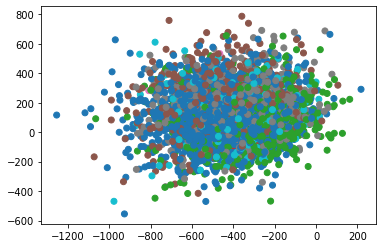

In [8]:
autoencoder = model
num_batches = 100
for i, (x, y) in enumerate(test_loader):
    _mu = autoencoder.encoder(x.to(device))
    if len(_mu)==2:
        mu = _mu[0]
    else:
        mu = _mu
    mu = mu.to('cpu').detach().numpy()
    label = y[:,2]
    plt.scatter(mu[:, 0], mu[:, 1], c=label, cmap='tab10')
    if i > num_batches:
        plt.colorbar()
        break

<Figure size 432x288 with 0 Axes>

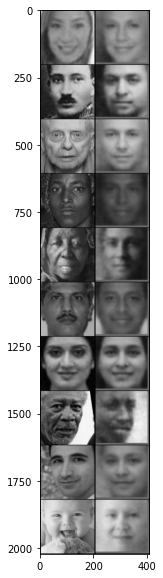

In [14]:
from torchvision.utils import make_grid

plt.figure()
imgs, labels = d
imgs = imgs[:10]
grid1 = np.asarray(make_grid(imgs,nrow=1).permute(1, 2, 0))
outs = model(imgs.to(device))
if len(outs) == 3:
    outs = outs[0]
else:
    outs = outs[1]
grid2 = np.asarray(make_grid(outs.cpu(),nrow=1).permute(1, 2, 0))

plt.figure(figsize=(10,10))
plt.imshow(np.concatenate((grid1,grid2),axis=1))




In [15]:
autoencoder = model
zs = []
ys = []
for i, (x, y) in enumerate(test_loader):
    mu = autoencoder.encoder(x.to(device))
    if len(mu) == 2:
        mu = mu[0]
    zs.append(mu.detach().cpu())
    ys.append(y.cpu())



In [16]:
z = torch.concat(zs)
y = torch.concat(ys)

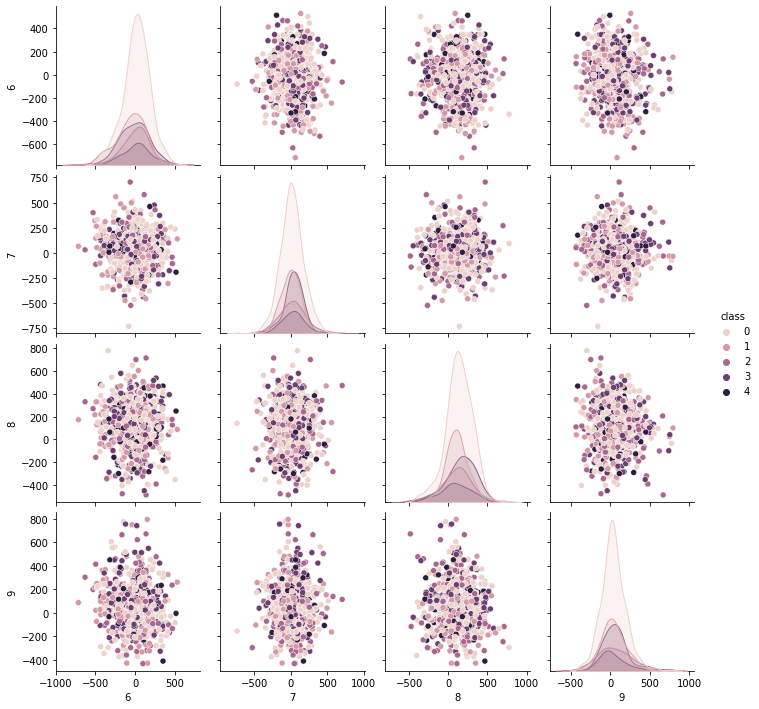

In [17]:
df = pd.DataFrame(z.numpy())
df["class"] = y[:,2].numpy()
sns.pairplot(df.iloc[:1000,-5:],hue="class")

In [25]:
from sklearn.metrics import auc, roc_auc_score


for i in range(20):
    score = roc_auc_score(y[:,1],z[:,i])
    print(max(score,1-score))

0.5623351199754477
0.5715695598102122
0.5116337883882401
0.6832186220458829
0.5288538483501215
0.6658784387098108
0.642310197048672
0.5198191091693344
0.5544358496625674
0.5454007540325987


IndexError: index 10 is out of bounds for dimension 1 with size 10